In [1]:
from keras.models import Sequential
from keras.layers import Input, Dense,TimeDistributed
from keras.models import Model
from keras.layers import Dense, LSTM, Bidirectional,Masking

Using TensorFlow backend.


In [2]:
inputs = [[[0,0,0],[0,0,0],[0,0,0],[0,0,0]],[[1,2,3],[4,5,6],[7,8,9],[10,11,12]],[[10,20,30],[40,50,60],[70,80,90],[100,110,120]]]


In [3]:
inputs

[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
 [[10, 20, 30], [40, 50, 60], [70, 80, 90], [100, 110, 120]]]

In [4]:
model = Sequential()
model.add(Masking(mask_value=0., input_shape = (4,3)))
model.add(Bidirectional(LSTM(3,return_sequences = True),merge_mode='concat'))
model.add(TimeDistributed(Dense(3,activation = 'softmax')))

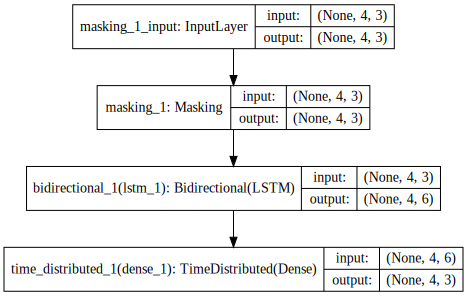

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
intermediate_layer_model = Model(input=model.input,output=model.layers[0].output)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=Tensor("ma...)`
  if __name__ == '__main__':


In [10]:
print (intermediate_layer_model.predict(inputs))

[[[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   1.    2.    3.]
  [   4.    5.    6.]
  [   7.    8.    9.]
  [  10.   11.   12.]]

 [[  10.   20.   30.]
  [  40.   50.   60.]
  [  70.   80.   90.]
  [ 100.  110.  120.]]]


In [11]:
intermediate_layer_model = Model(input=model.input,output=model.layers[1].output)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bi..., inputs=Tensor("ma...)`
  if __name__ == '__main__':


In [12]:
intermediate_layer_model

In [13]:
intermediate_layer_model.predict(inputs)

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.        ,  0.13257015, -0.4192833 , -0.25944749, -0.09258353,
          0.0963733 ],
        [ 0.        ,  0.32839522, -0.85336912, -0.20833594, -0.03031166,
          0.        ],
        [ 0.        ,  0.48492175, -0.973418  , -0.15564932,  0.        ,
          0.        ],
        [ 0.        ,  0.59683365, -0.99610376, -0.08679038,  0.        ,
          0.        ]],

       [[ 0.        ,  0.        , -0.76159418, -0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.43557802, -0.96402758, -0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.8

In [15]:
intermediate_layer_model = Model(input=model.input,output=model.layers[2].output)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ti..., inputs=Tensor("ma...)`
  if __name__ == '__main__':


In [16]:
intermediate_layer_model.predict(inputs)

array([[[ 0.33333334,  0.33333334,  0.33333334],
        [ 0.33333334,  0.33333334,  0.33333334],
        [ 0.33333334,  0.33333334,  0.33333334],
        [ 0.33333334,  0.33333334,  0.33333334]],

       [[ 0.38222098,  0.29267484,  0.32510412],
        [ 0.40549007,  0.24634564,  0.34816438],
        [ 0.40113768,  0.23550257,  0.36335972],
        [ 0.38497272,  0.23610598,  0.37892121]],

       [[ 0.40381223,  0.23520492,  0.36098278],
        [ 0.38469031,  0.23078139,  0.38452831],
        [ 0.34937656,  0.24651097,  0.40411243],
        [ 0.34280652,  0.2496047 ,  0.40758875]]], dtype=float32)